First we give a schematic plan of the building.

In [2]:
# Import numpy library (for arrays operations)
# Import matplotlib.pyplot interface (for MATLAB-like plots)
# Use magic line '%matplotlib notebook' to allow the plot to be interactive within Jupyter Notebook

import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [3]:
# Range of coordinates indices

x, y, z = np.indices((12, 26, 6))

In [4]:
# Definition of the building (volumes and colors)

ground = (x < 12) & (y < 26) & (z < 1)
floors = (x < 12) & (y < 26) & (1 <= z) & (z < 6)
building = ground | floors

building_color = np.empty(building.shape, dtype=object)
building_color[ground] = 'grey'
building_color[floors] = 'white'

In [5]:
# Definition of the 4th floor apartments (volumes and colors)

apart_41 = (0 <= x) & (x < 12) & (19 <= y) & (y < 26) & (3 <= z) & (z < 4)
apart_42 = (8 <= x) & (x < 12) & (10 <= y) & (y < 19) & (3 <= z) & (z < 4)
apart_43 = (6 <= x) & (x < 12) & (0 <= y) & (y < 8) & (3 <= z) & (z < 4)
apart_44 = (0 <= x) & (x < 6) & (0 <= y) & (y < 10) & (3 <= z) & (z < 4)
apart_45 = (0 <= x) & (x < 6) & (10 <= y) & (y < 17) & (3 <= z) & (z < 4)
apartments = apart_41 | apart_42 | apart_43 | apart_44 | apart_45

apartments_color = np.empty(building.shape, dtype=object)
apartments_color[apart_41] = 'gold'
apartments_color[apart_42] = 'red'
apartments_color[apart_43] = 'blue'
apartments_color[apart_44] = 'violet'
apartments_color[apart_45] = 'green'

<IPython.core.display.Javascript object>


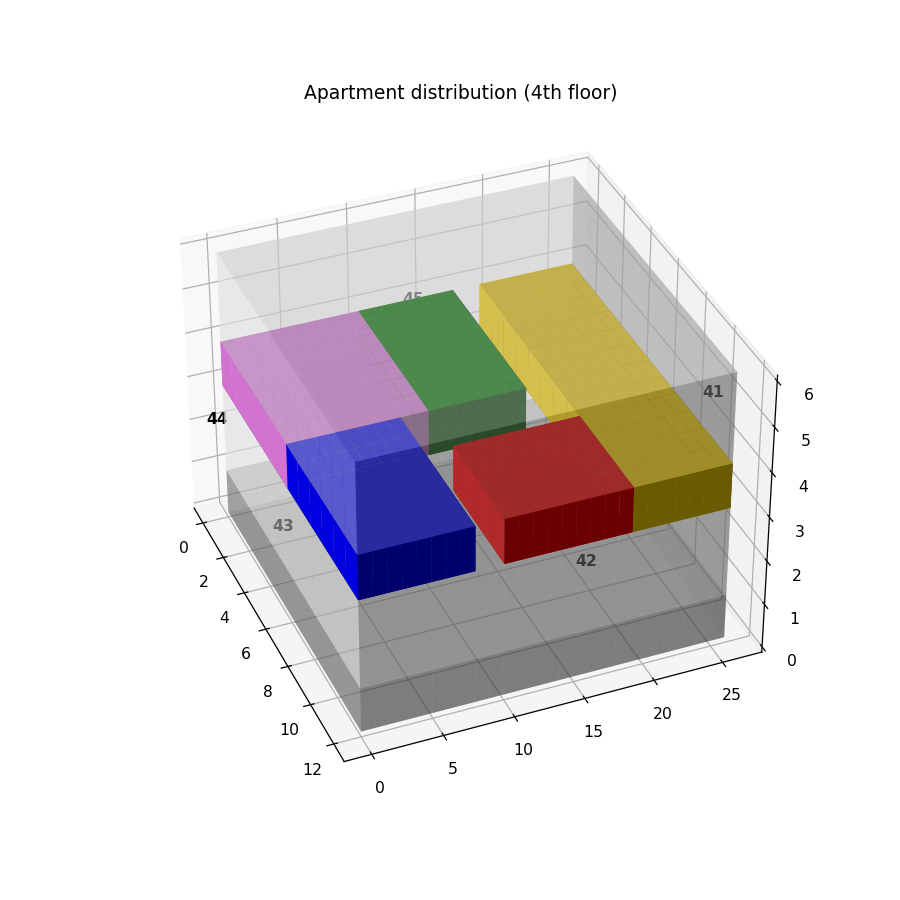

In [6]:
# Interactive 3D plot of the building

ax = plt.figure(figsize=(8, 8)).add_subplot(projection='3d')
ax.voxels(building, facecolors=building_color, alpha=0.4)
ax.voxels(apartments, facecolors=apartments_color)

plt.title('Apartment distribution (4th floor)')

ax.text(8.5, -3, 3.3, '43', weight='bold')
ax.text(2.5, -3, 3.3, '44', weight='bold')
ax.text(7, 29, 3.3, '41', weight='bold')
ax.text(13.5, 13.5, 3.3, '42', weight='bold')
ax.text(-1.5, 14.5, 3.3, '45', weight='bold')

plt.show()

In [7]:
# Import os module (for interacting with the operating system)
# Import pandas library (for data analysis in Python)
# Import create_engine from the sqlalchemy toolkit (standard SQL toolkit in Python)
# Import load_dotenv from the dotenv module (for setting environment variables)

import os
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv

In [8]:
# Load from a (hidden) .env file the mysql credentials of the mysql database of the building

load_dotenv()
user = os.getenv('MYSQL_USER')
passwd = os.getenv('MYSQL_PASSWORD')
host = os.getenv('MYSQL_HOST')
port = os.getenv('MYSQL_PORT')
db = os.getenv('MYSQL_DB')

In [47]:
# Creates a connection ("engine") to the mysql database using the hidden credentials

engine = create_engine('mysql://%s:%s@%s:%s/%s' % (user, passwd, host, port, db))

The study relies on 3 tables from the database, "Apartments", "Power" and "Temperatures", that we now describe.

The Apartments table contains the list of all units of the building (31 apartments + 4 weather stations). The "esmart_id" is the identification number given to each unit by the firm eSMART. The column "name" is a more intuitive identification number for the units. For instance, the name "43" corresponds to floor n°4, apartment n°3.

In [19]:
# Reads the Apartments table into a DataFrame "df_apart"

df_apart = pd.read_sql('SELECT * FROM Apartments', engine)
df_apart

,esmart_id,name
0,1046,11
1,1047,12
2,1048,13
3,1049,14
4,1050,15
5,1041,21
6,1042,22
7,1043,23
8,1044,24
9,1045,25


The Power table contains information about power consumption of each unit. Each row of the table contains the "apartment_id" (= esmart_id), the "module_id" of the module taking the measure, namely,

- <b>17</b> for electric power measured in Watt [W],
- <b>18</b> for the energy measured in Watt-hour [W⋅h]

the "date" of the measure and the "value" measured by the module.

In [45]:
# Reads the Power table into a DataFrame "df_power"

df_power = pd.read_sql('SELECT * FROM Power WHERE module_id=18 LIMIT 100', engine)
df_power

,apartment_id,module_id,date,value
0,1026,18,2017-10-14,367000
1,1026,18,2017-10-15,372000
2,1026,18,2017-10-16,377000
3,1026,18,2017-10-17,382000
4,1026,18,2017-10-18,389000
...,...,...,...,...
95,1026,18,2018-01-17,2889000
96,1026,18,2018-01-18,2925000
97,1026,18,2018-01-19,2955000
98,1026,18,2018-01-20,2979000


The Temperatures table contains information about temperatures in each unit. Each row of the table contains the "apartment_id", the "module_id" for the room location of the module taking the measure, namely,

- <b>26</b> for the living room,
- <b>25</b> for dormitory 1,
- <b>1</b> for dormitory 2,
- <b>2</b> for dormitory 3,
- <b>37</b> for dormitory 4,
- <b>38</b> for dormitory 5,
- <b>53</b> for bathroom 1,
- <b>54</b> for bathroom 2,

the "date" of the measure, the "action" of the module (<b>get</b> for the temperature measured in the room and <b>set</b> for the temperature set in the room) and the "value" for the temperature.

In [46]:
# Reads the Temperatures table into a DataFrame "df_temp"

df_temp = pd.read_sql('SELECT * FROM Temperatures WHERE module_id=54 LIMIT 100', engine)
df_temp

,apartment_id,module_id,date,action,value
0,1036,54,2021-03-15 11:52:54,set,21.0
1,1036,54,2021-03-15 11:59:53,set,21.0
2,1036,54,2021-03-15 12:10:21,set,21.0
3,1036,54,2021-03-15 12:20:49,set,21.0
4,1036,54,2021-03-15 12:31:18,set,21.0
...,...,...,...,...,...
95,1036,54,2021-03-16 03:42:04,set,21.0
96,1036,54,2021-03-16 03:52:32,set,21.0
97,1036,54,2021-03-16 04:03:00,set,21.0
98,1036,54,2021-03-16 04:09:59,set,21.0
